# ۱-چیست و شرط لازم برای استفاده از آنها چیستensemble learning روش های

#### voting classifiers, bagging and pasting ensembles, random forests, and boosting, and stacking ensembles                                 
#### Ensemble learning is primarily used to improve the (classification, prediction, function approximation, performance of a model, or reduce the likelihood of an unfortunate selection of a poor one

# ۲- را برای بهبود پیشنهاد میدهید ensembleشرکتی چند مدل برای پیش بینی قیمت نهایی کالا ترین کرده ولی همه ی آنها حتی روی داده های ترین هم به خوبی پاسخگو نیستند کدام روش

#### when the model has high bias and the accuracy of train is very low so we should use BOOSTING to improve the performance of model       
#### but when the model has high variane and the accuracy of train is very high we should use Bagging to improve the performance of model

# ۳- دو معیار برای پیدا کردن ریشه در درخت تصمیم چیست و سه الگوریتم برای ایجاد آن را نام ببرید

#### gini,entropy                                                 
#### There are 4 popular types of decision tree algorithms: ID3, CART (Classification and Regression Trees), Chi-Square and Reduction in Variance.

# ۴-  چی بودbootstrapمنظور از

#### bootstrapping is random sampling with replacement from the available training data. Bagging (= bootstrap aggregation) is performing it many times and training an estimator for each bootstrapped dataset

# ۵-  را میتوان روی داده های لیبل دار زد ؟ چه روشی پیشنهاد شماست؟pcaآیا

#### yes, we can use PCA for both supervised(labled) and unsupervised learning(unlabled)
#### also we can use LDA for just supervised learning 

# ۶-نیاز به استقلال دارد random forest چرا


#### each individual trees are independent of each other because they consider different subset of features and samples

# ‍7-  دو دیتای داده شده را با درخت تصمیم پیش بینی کرده و درخت را پرینت بگیریدirisروی دیتاست 

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [2]:
iris = load_iris()

In [3]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = pd.get_dummies(y)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

In [9]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display


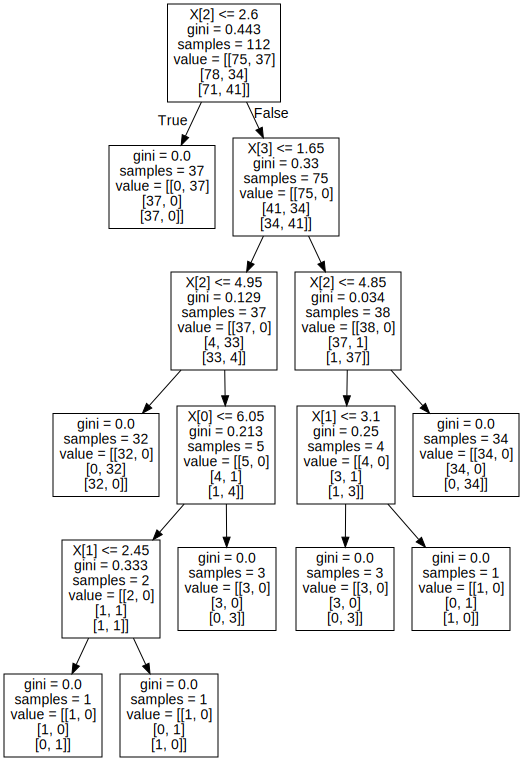

In [11]:
display(graphviz.Source(export_graphviz(dt)))

In [12]:
X1_test=[[6.1, 2.8, 1.8, 1.9]]
X2_test=[[8.1, 3.1, 2.5, 2.9]]

In [13]:
y_pred = dt.predict(X_test)

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
dt.predict(X1_test)

array([[1, 0, 0]], dtype=uint8)

In [16]:
dt.predict(X2_test)

array([[1, 0, 0]], dtype=uint8)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score ,classification_report


In [18]:
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test,y_pred)
print('accuracy: %.3f' %accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38
 samples avg       0.97      0.97      0.97        38

accuracy: 0.974


# ۸- روی دیتای پیش بینی بیماری قلبی با استفاده از درsvmالگوریتم greed search random search پیش بینی را انجام دهی


In [7]:
binary = pd.CategoricalDtype(categories=[0, 1])
df = pd.read_csv('heart.csv',   dtype={
        'sex':binary,
        'cp':pd.CategoricalDtype(categories=range(1,5)),
        'fbs':binary,
        'restecg':pd.CategoricalDtype(categories=range(3)),
        'exang':binary,
        'slope':pd.CategoricalDtype(categories=range(1,4)),
        'ca':pd.CategoricalDtype(categories=range(4)),
        'thal':pd.CategoricalDtype(categories=[3,6,7]),
        'target':pd.CategoricalDtype(categories=range(2), ordered=True),
    }
)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,NaN,0,NaN,1
1,37,1,2,130,250,0,1,187,0,3.5,NaN,0,NaN,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,NaN,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,NaN,1
4,57,0,NaN,120,354,0,1,163,1,0.6,2,0,NaN,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        160 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     282 non-null    category
 11  ca        298 non-null    category
 12  thal      117 non-null    category
 13  target    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 15.7 KB


In [9]:
s =df.drop(['target'],axis=1).dtypes == 'category'
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
No. of. categorical features:  8


In [10]:
df1 = pd.get_dummies(df, columns = object_cols)
df1

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
0,63,145,233,150,2.3,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,37,130,250,187,3.5,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,41,130,204,172,1.4,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3,56,120,236,178,0.8,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,0
4,57,120,354,163,0.6,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
299,45,110,264,132,1.2,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
300,68,144,193,141,3.4,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
301,57,130,131,115,1.2,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0


In [11]:
df1=df1.fillna({'ca':0, 'thal':3, 'target':1})

In [12]:
df1.isnull().sum()

age          0
trestbps     0
chol         0
thalach      0
oldpeak      0
target       0
sex_0        0
sex_1        0
cp_1         0
cp_2         0
cp_3         0
cp_4         0
fbs_0        0
fbs_1        0
restecg_0    0
restecg_1    0
restecg_2    0
exang_0      0
exang_1      0
slope_1      0
slope_2      0
slope_3      0
ca_0         0
ca_1         0
ca_2         0
ca_3         0
thal_3       0
thal_6       0
thal_7       0
dtype: int64

In [13]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 


In [14]:
X = df1.drop(['target'],axis=1).values
y = df1['target'].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

## Grid search

In [27]:
pipe = make_pipeline(StandardScaler(),PCA(random_state=42), SVC())
param_grid={"pca__n_components": np.arange(1, 29),'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__C': [0.1, 1, 10, 100]}
clf_gridSearch = GridSearchCV(pipe, param_grid,cv=3, scoring='f1_macro')

In [28]:
clf_gridSearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(random_state=42)),
                                       ('svc', SVC())]),
             param_grid={'pca__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
                         'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10]},
             scoring='f1_macro')

In [29]:
print('GridSearch CV best score : {:.4f}\n\n'.format(clf_gridSearch.best_score_))
print('Parameters that give the best results :','\n\n', (clf_gridSearch.best_params_))

GridSearch CV best score : 0.8675


Parameters that give the best results : 

 {'pca__n_components': 5, 'svc__C': 1, 'svc__gamma': 0.1}


In [31]:
svc = make_pipeline(preprocessing.StandardScaler(),PCA(n_components=5),SVC(kernel='linear',C=1,gamma=0.01,probability=True))
svc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('svc',
                 SVC(C=1, gamma=0.01, kernel='linear', probability=True))])

In [32]:
Y_pred = svc.predict(X_test) 

In [33]:
print(classification_report(y_test, Y_pred))

accuracy = accuracy_score(y_test,Y_pred)
print('accuracy: %.3f' %accuracy)

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        23
           1       0.88      0.76      0.82        38

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.80      0.79      0.79        61

accuracy: 0.787


## Random Search


In [34]:
pipe1= make_pipeline(StandardScaler(),PCA(random_state=42), SVC())
param_grid={"pca__n_components": np.arange(1, 29),'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__C': [0.1, 1, 10, 100]}
clf_Random = RandomizedSearchCV(pipe1, param_grid,cv=3, scoring='f1_macro')

In [35]:
clf_Random.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('pca', PCA(random_state=42)),
                                             ('svc', SVC())]),
                   param_distributions={'pca__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
                                        'svc__C': [0.1, 1, 10, 100],
                                        'svc__gamma': [0.001, 0.01, 0.1, 1,
                                                       10]},
                   scoring='f1_macro')

In [36]:
print('GridSearch CV best score : {:.4f}\n\n'.format(clf_Random.best_score_))
print('Parameters that give the best results :','\n\n', (clf_Random.best_params_))

GridSearch CV best score : 0.8333


Parameters that give the best results : 

 {'svc__gamma': 10, 'svc__C': 1, 'pca__n_components': 1}


In [37]:
svc1 = make_pipeline(preprocessing.StandardScaler(),PCA(n_components=1),SVC(kernel='linear',C=10,gamma=0.01,probability=True))
svc1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=1)),
                ('svc',
                 SVC(C=10, gamma=0.01, kernel='linear', probability=True))])

In [38]:
Y_pred = svc1.predict(X_test) 

In [39]:
print(classification_report(y_test, Y_pred))

accuracy = accuracy_score(y_test,Y_pred)
print('accuracy: %.3f' %accuracy)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.86      0.86      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

accuracy: 0.869


## linux


1-برای تنظیمات گراب بهتر است کدوم فولدر تغییر داده شود 

grub.cfg

2-
شما برنامه ای را برای پیش بینی قیمت کالا نوشته اید این برمامه برای ران شدن احتیاج به خواندن ورودی به عنوان کانفیگ دارد کانفیگ های برنامه بهتر است چگونه و در کجا اعمال شوند 

#3-به نظر شما نود پرینتر یا هر سخت افزار در کدام فولدر ذخیره میشود

# 4-چیست bios کار 

بایوس یا   (Basic Input/Output System)  ابزاری است که سخت افزار سیستم را در مرحله آغازین کار سیستم  LOW_LEVEL  و قبل از شروع کار سیستم عامل شناسائی کرده و پس از کسب اطمینان از کارائی آن به سیستم عامل در شناسائی و کار با این سخت افزار کمک میکند

# 5- منظور از ~ چیست

The ~ (tilde) is a quick way of specifying your home directory. The ~/. somefilename means your home directory, the file